<a href="https://colab.research.google.com/github/PMartey/DataJourney/blob/main/LogisticRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [1]:
import os

# Third party import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Load Data

In [ ]:
data = pd.read_csv('/content/Training and Test Data.csv', encoding='ISO-8859-1')
data.head()





In [3]:
# Convert to a data frame
df = pd.DataFrame(data = data)
# You can remove extra whitespace using the strip() function:
df.columns = df.columns.str.strip()
#Change 'Zip Code' to String data type
df['Zip Code'] = df['Zip Code'].astype(str)
#Get a list of all Columns
df.columns

Index(['Zip Code', 'City', 'State', 'County', 'Target', 'Mean Income 2018',
       'Unemployment Rate 2018(%)', 'Crime Rate 2018(%)',
       'Income Tax 2018 (Single filer)',
       'Income Tax 2018 (Married filing jointly)', 'Mean Income 2019',
       'Unemployment Rate 2019(%)', 'Crime Rate 2019(%)',
       'Population Estimate 2018', 'Population Growth Rate from 2018 to 2019'],
      dtype='object')

In [4]:
# dropping columns for 2019 independent variables
ds = df.drop(['Mean Income 2019',
       'Unemployment Rate 2019(%)', 'Crime Rate 2019(%)'], axis = 1)
ds.columns

Index(['Zip Code', 'City', 'State', 'County', 'Target', 'Mean Income 2018',
       'Unemployment Rate 2018(%)', 'Crime Rate 2018(%)',
       'Income Tax 2018 (Single filer)',
       'Income Tax 2018 (Married filing jointly)', 'Population Estimate 2018',
       'Population Growth Rate from 2018 to 2019'],
      dtype='object')

# Basic Descriptive Statistics

In [5]:
ds.describe()

,Target,Mean Income 2018,Unemployment Rate 2018(%),Crime Rate 2018(%),Income Tax 2018 (Single filer),Income Tax 2018 (Married filing jointly),Population Estimate 2018,Population Growth Rate from 2018 to 2019
count,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1.690000e+03,1690.000000
mean,0.887574,75228.503362,3.842781,2.093373,0.053938,0.053938,4.426638e+05,0.305907
std,0.315983,55755.809654,1.114865,3.217379,0.012412,0.012412,8.370840e+05,0.940140
min,0.000000,19388.888890,1.800000,0.000000,0.030700,0.030700,3.304000e+03,-4.634994
25%,1.000000,50000.000000,3.100000,0.100000,0.047500,0.047500,4.541250e+04,-0.225323
50%,1.000000,60471.152165,3.700000,0.550000,0.054990,0.054990,1.784180e+05,0.094918
75%,1.000000,80711.947463,4.300000,3.000000,0.065700,0.065700,5.640920e+05,0.664361
max,1.000000,665797.916700,12.600000,36.100000,0.088200,0.088200,7.523869e+06,4.339568


# Exploratory Data Analysis (EDA) - pairplots

Plotting every varaible in the data set against each other

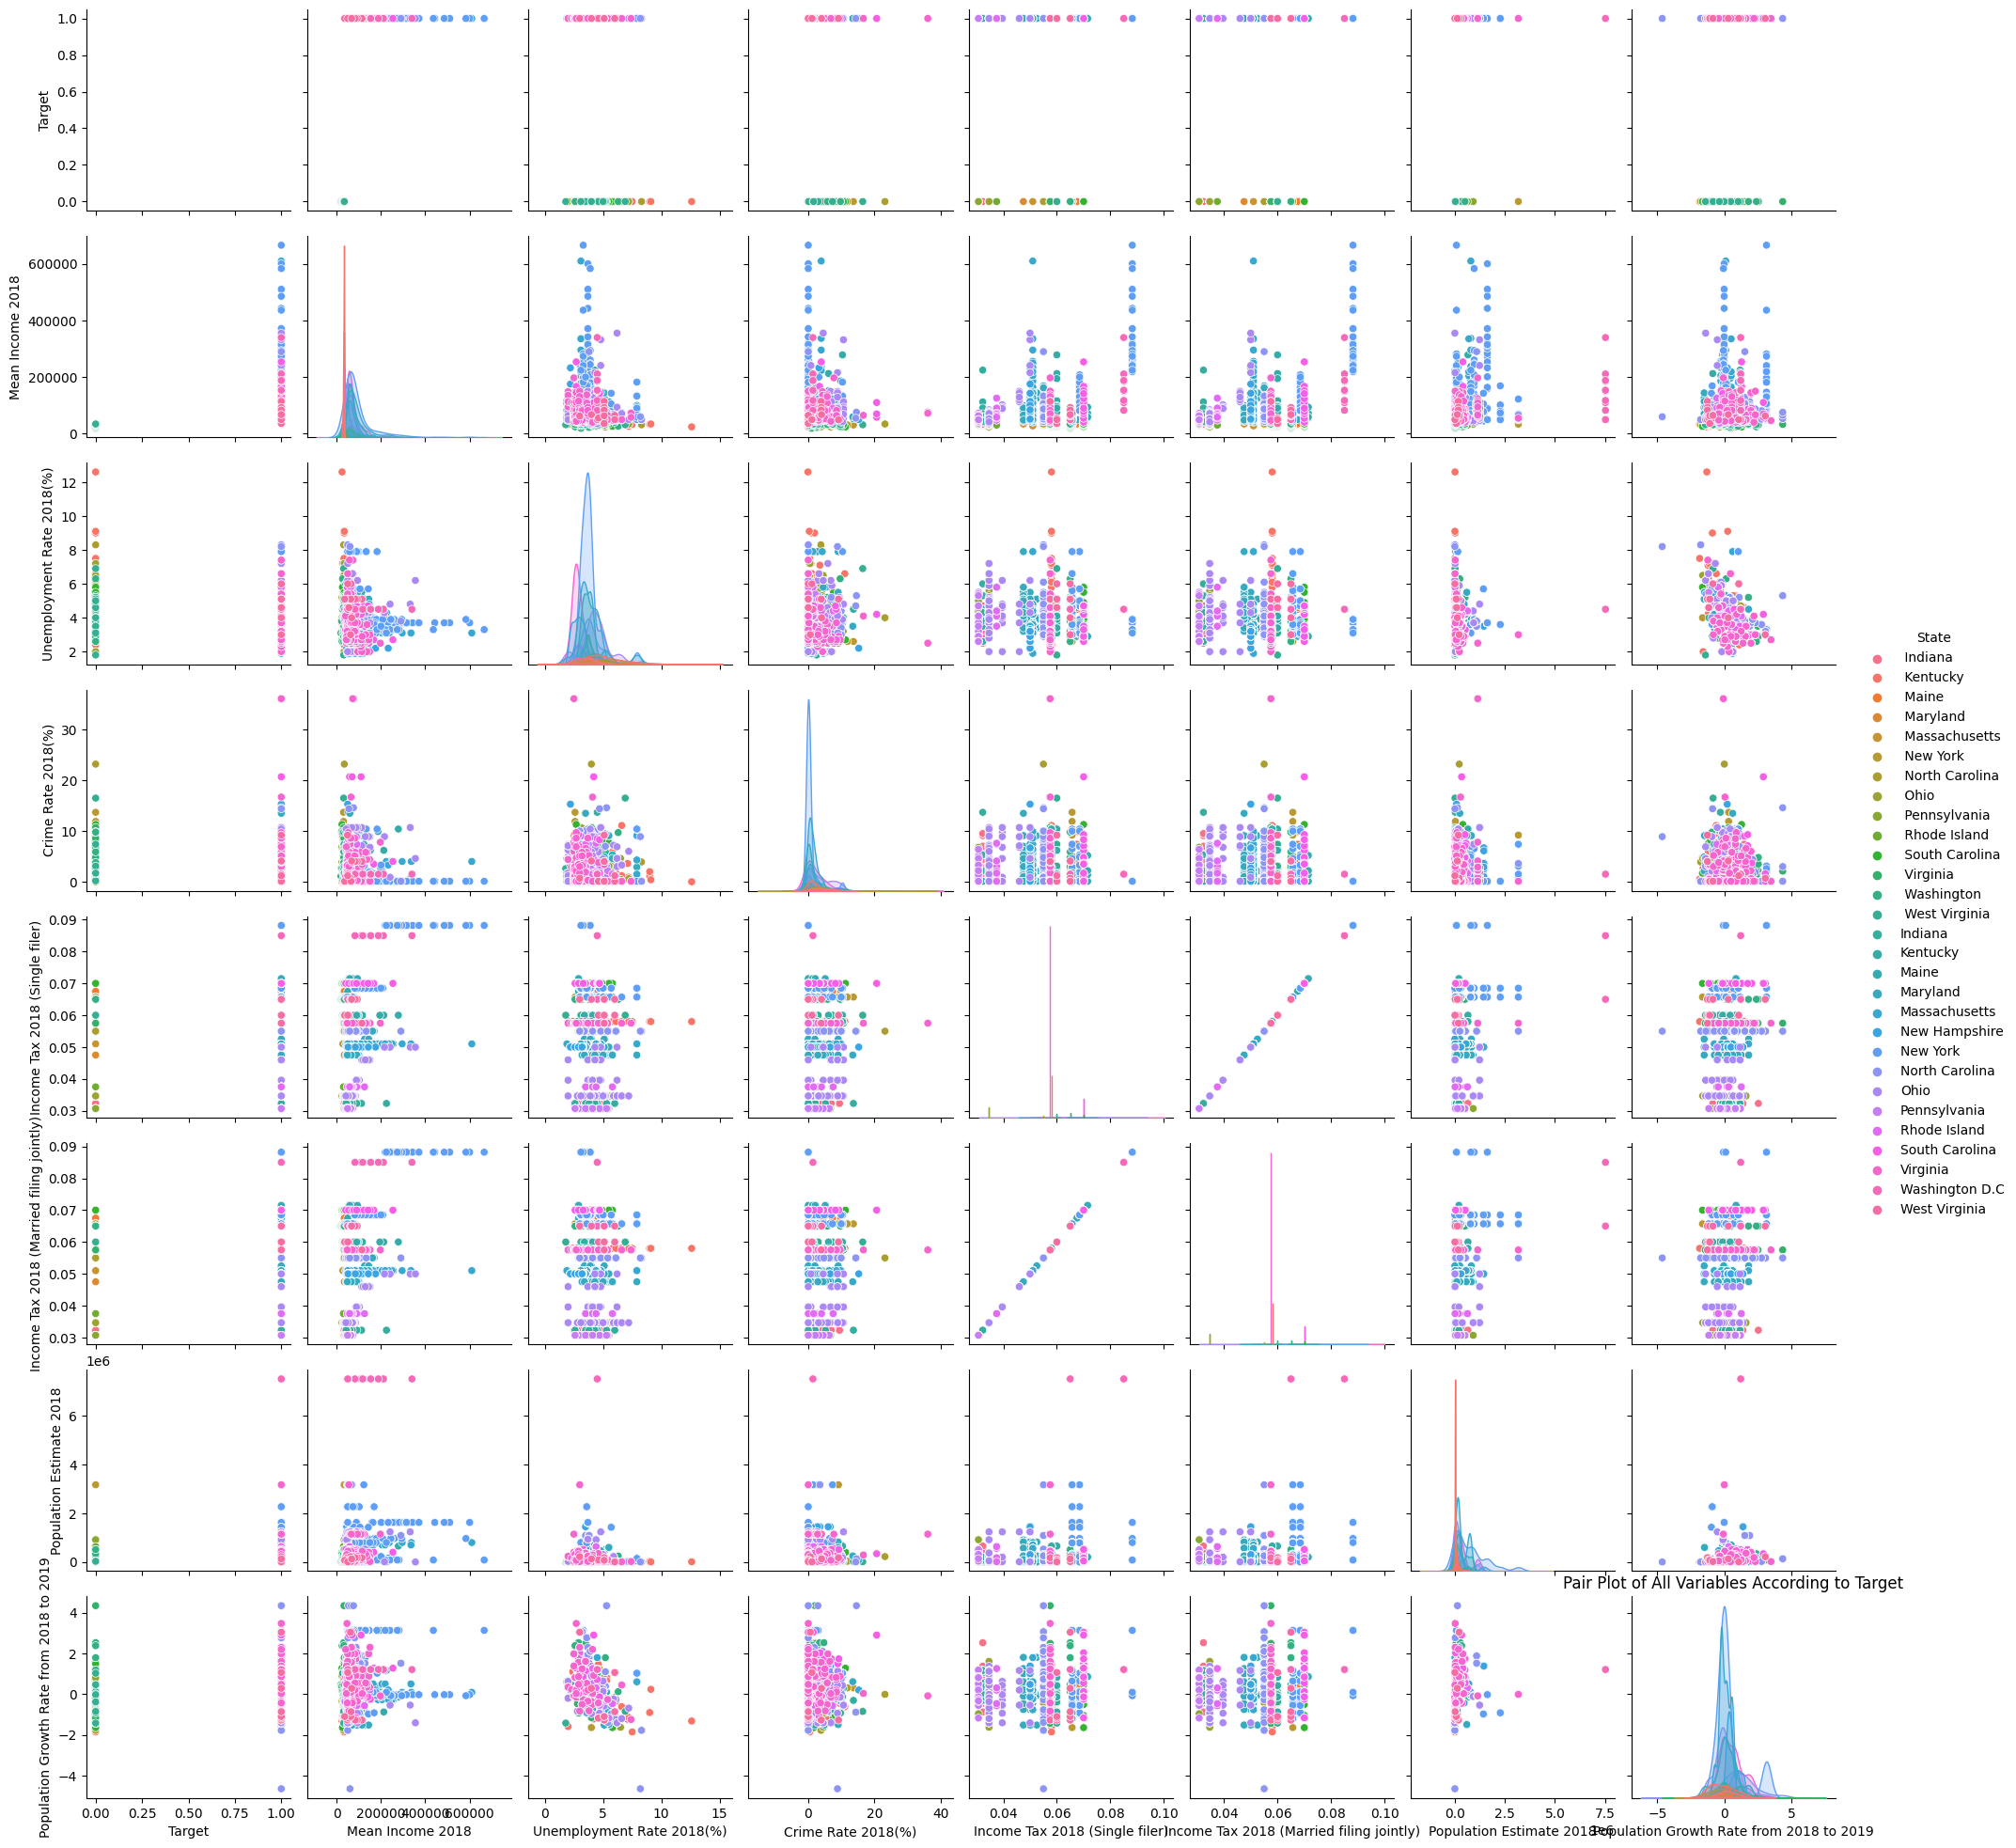

In [6]:
# Pair Plot Colors by state
sns.pairplot(ds, hue = 'State')
#Give plot a Title
plt.title('Pair Plot of All Variables According to Target')
plt.show()

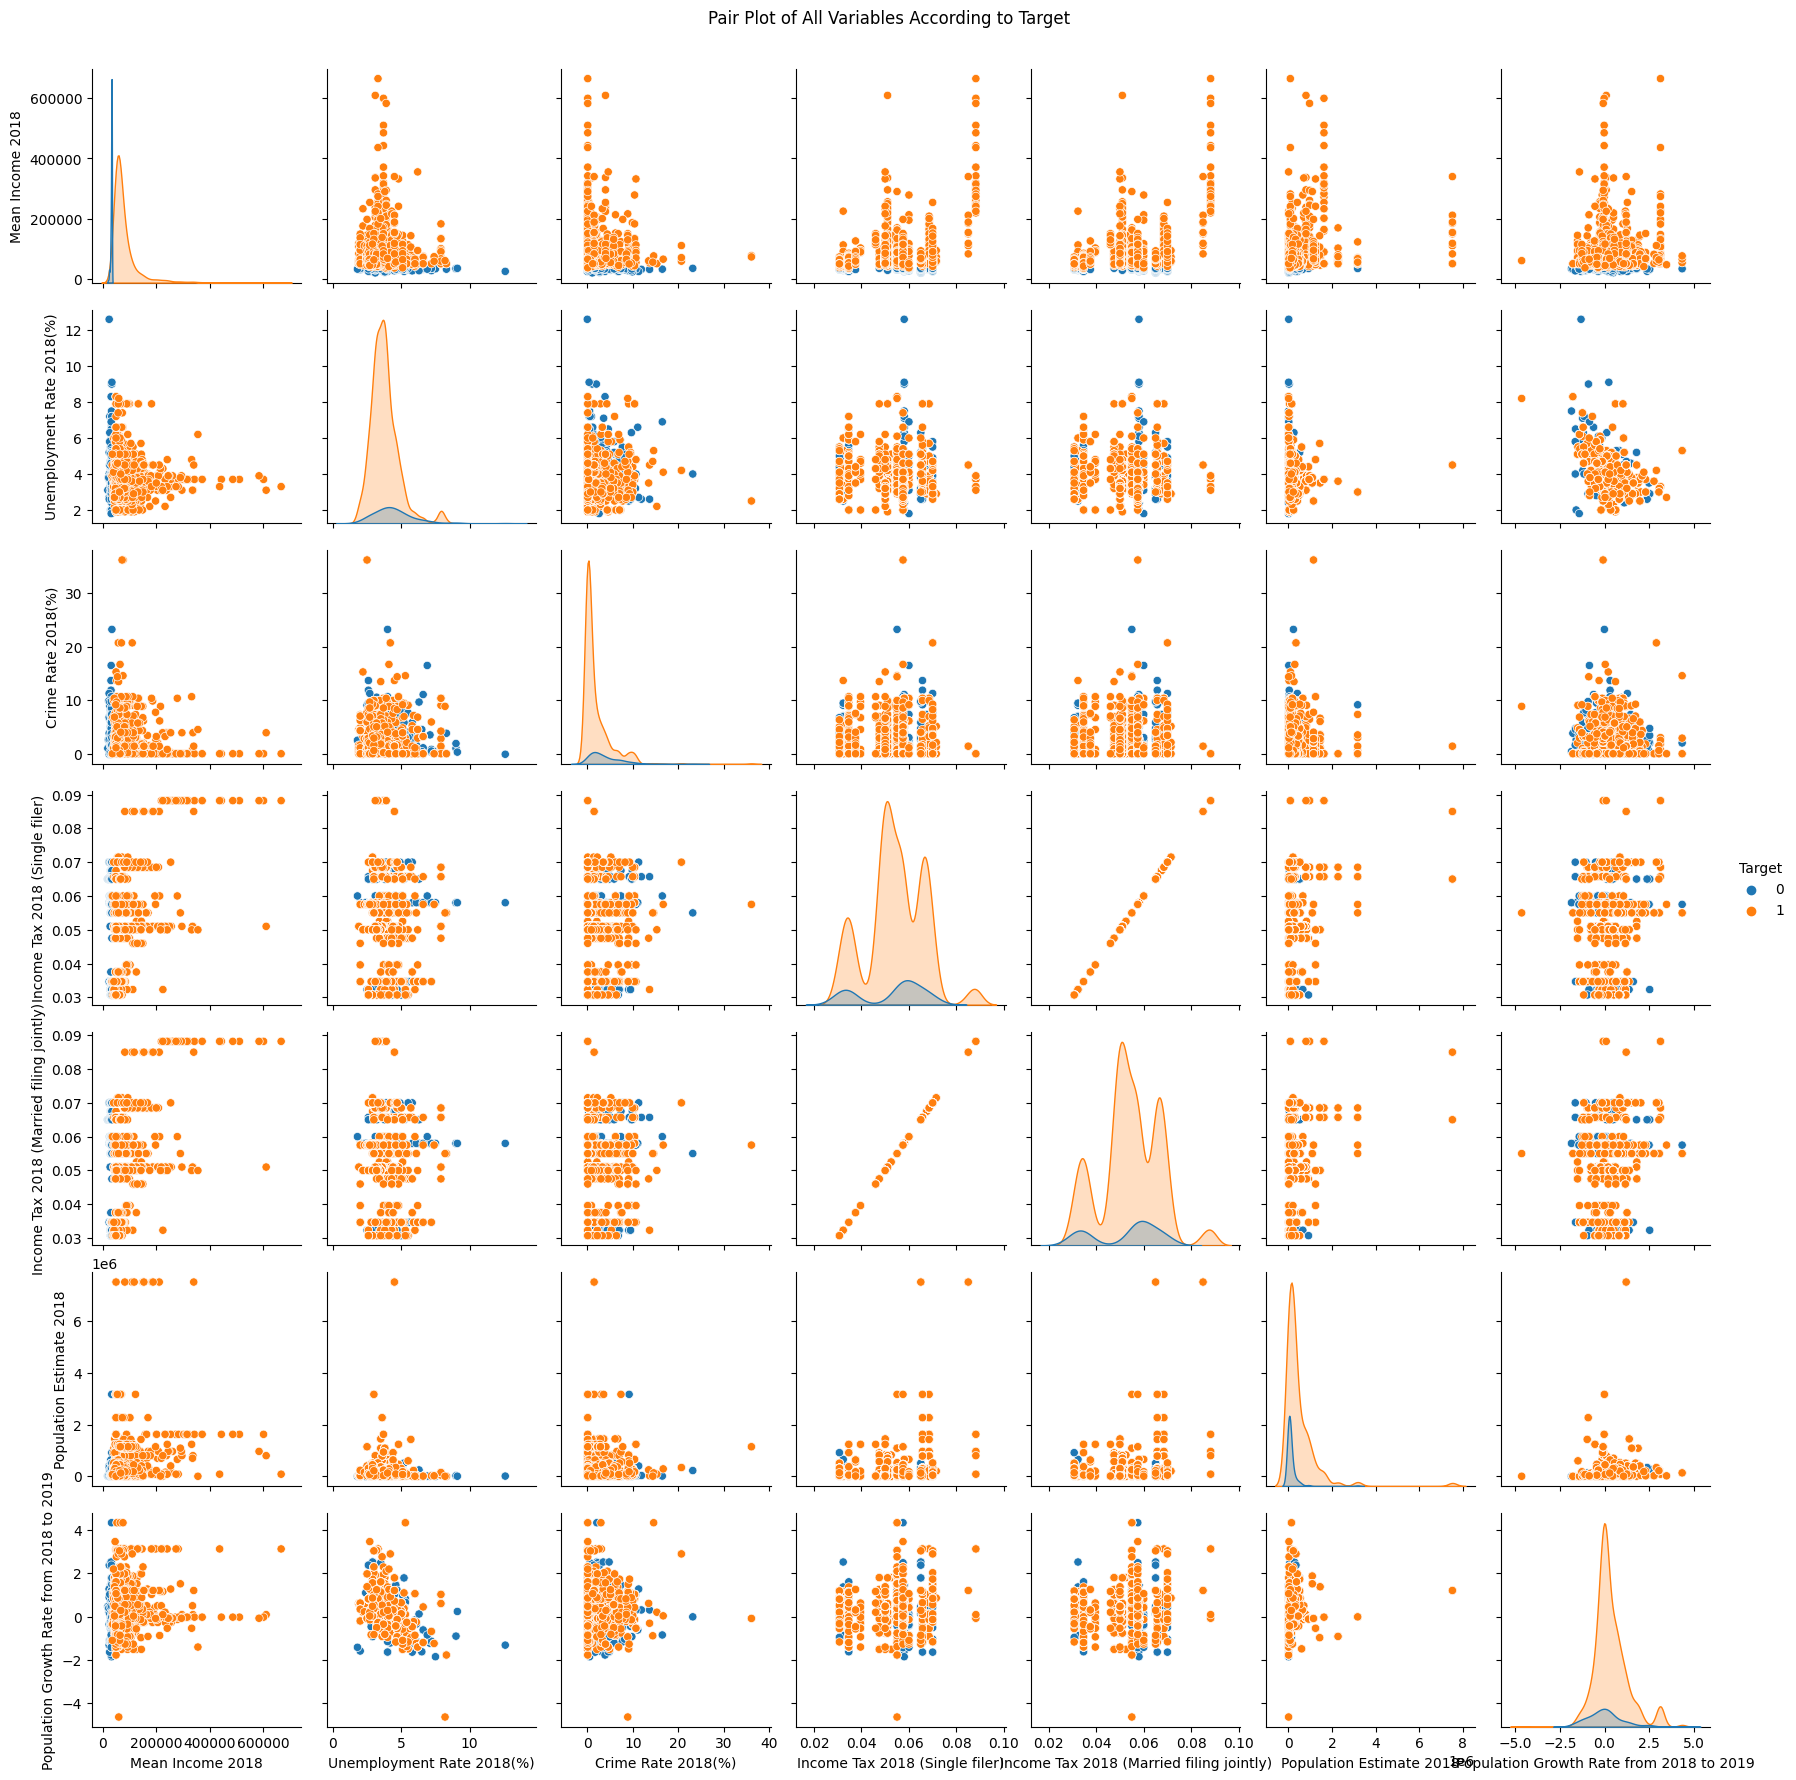

In [7]:
#Pair plot Colors by Target
sns.pairplot(ds, hue = 'Target')
#Give plot a Title
plt.suptitle('Pair Plot of All Variables According to Target',  y = 1.02)
plt.show()

From the plot above you can see that income has more effect in determining the zipcode with 0 as the target.
Whereas, the other 4 attributes are clustered in one area.

**We will be using Logistic Linear Regression **
# Modeling - What is our baseline?
What is the simplest model we can think of?

We will be using the Logistic Linear Regression model
In statistics, the logistic model (or logit model) is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination).

In this case, if our baseline model is just randomly guessing the target location or zip code which is successful then we expect to get the data right 88.76% of the time so we are expecting a model accuracy of 0.8876, since we have 1500 for class 1 and 190 for class 0 (Target Location not a target Location)

So our model should at least beat 88% accuracy.

# Train Test Split
 You always want to evaluate your final model on a test set that hasn't been used at all in the training process. So we will split off a test set here.

_(Note: This might be a little less true if you use cross-validation, but it is still considered a best practice.)

In [16]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#define training and testing variables from the ds dataframe
ds_train, ds_test = train_test_split(ds, test_size = 0.25)
# Viewing Shape of the data
ds_train.shape, ds_test.shape

((1267, 12), (423, 12))

In [17]:
# Viewing the first 5 train data
ds_train.head()

,Zip Code,City,State,County,Target,Mean Income 2018,Unemployment Rate 2018(%),Crime Rate 2018(%),Income Tax 2018 (Single filer),Income Tax 2018 (Married filing jointly),Population Estimate 2018,Population Growth Rate from 2018 to 2019
1178,28704,Arden,North Carolina,Buncombe County,1,60828.20755,3.0,0.1,0.05499,0.05499,259259,0.745201
360,21401,Annapolis,Maryland,Anne Arundel County,1,99424.11533,3.2,4.6,0.04750,0.04750,575523,0.644805
1192,28775,Scaly Mountain,North Carolina,Macon County,1,60440.90909,5.4,0.1,0.05499,0.05499,18321,-1.380929
737,10013,New York City,New York,New York County,1,485458.29240,3.7,0.1,0.08820,0.08820,1629055,-0.021423
1509,20184,Upperville,Virginia,Fauquier County,1,131426.08700,2.6,0.1,0.05750,0.05750,70642,0.821041


# Prepare our data for Modeling
This involves splitting the data back out into NumPy arrays. NumPy is what is used for training the data set

In [27]:
x_train = ds_train.drop(columns=["Zip Code","City", "State", "County", "Target","Population Estimate 2018"]).values
y_train = ds_train['Target'].values
x_test = ds_test.drop(columns  =["Zip Code","City", "State", "County", "Target","Population Estimate 2018"]).values
y_test = ds_test['Target'].values

# Modeling Logistic Linear Regression


In [52]:
# Import Logistic Regression Library from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [53]:
#Score Model
result = model.score(x_test, y_test)
print("Accuracy: %.3f%%" % (result * 100.0))



Accuracy: 94.799%


# Evaluate using K-Fold Cross Validation

The result is a more reliable estimate of the performance of the algorithm on new data. It is
more accurate because the algorithm is trained and evaluated multiple times on different data.

In [36]:
from sklearn.model_selection import cross_val_score , cross_val_predict
from sklearn.model_selection import KFold
num_folds = 3
seed = 7
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, x_train, y_train, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.633% (0.872%)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 94.711% (2.208%)


In [37]:
# Check Predictions on test data
y_pred = cross_val_predict(model, x_test, y_test, cv=kfold)
# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.75      0.79        48
           1       0.97      0.98      0.97       375

    accuracy                           0.96       423
   macro avg       0.90      0.87      0.88       423
weighted avg       0.95      0.96      0.95       423



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Receiver Operating Characteristic (ROC) Curve
Evaluating the performance of my Logistic Regression Model

As you can see in the graph below our  ROC curve is closer to the top-left corner, thus our model has a better performance.

So we can go ahead and use it to predict the other zipcodes from ( Georgia, Kentucky, Mississippi, Tennesse, Alabama, Maryland, and South Carolina.

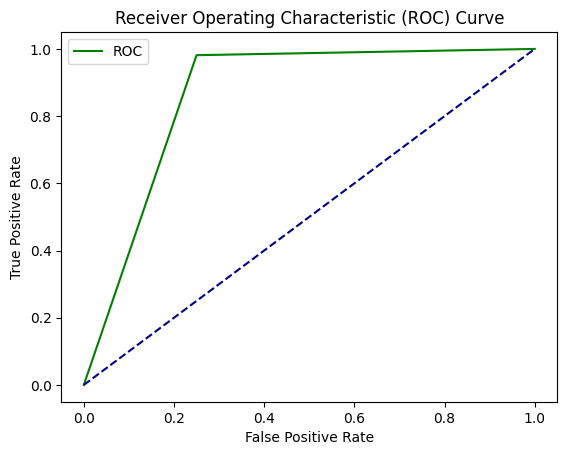

In [38]:
# Calculate the True Positive Rate (TPR) and False Positive Rate (FPR)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold values. The TPR is the proportion of positive samples that are correctly classified, and the FPR is the proportion of negative samples that are incorrectly classified as positive.

The ROC curve can be used to evaluate the performance of a binary classification model. The closer the ROC curve is to the top-left corner, the better the performance of the model. A model with a ROC curve that is close to the diagonal line is not very good, because it has a high FPR and a low TPR.


The ROC curve shows that the model is able to correctly classify most of the positive and negative samples. The area under the ROC curve (AUC) is 0.95, which indicates that the model is performing well.

# Predicting on 7 States in the South Eastern Part of the USA


In [57]:
# Load predition data
PData = pd.read_csv("/content/11-20 Predictions data .csv", encoding= 'ISO-8859-1' )
PData

,Zip Code,City,State,County,Mean Income 2018,Unemployment Rate 2018(%),Crime Rate 2018(%),Income Tax 2018 (Single filer),Income Tax 2018 (Married filing jointly),2018 Population estimate,Pop Growth Rate from 2018 to 2019
0,30002,Avondale Estates,Georgia,DeKalb County,2.624810e+05,4.5,0.001000,0.06,0.06,71407,0.148445
1,30004,Alpharetta,Georgia,Cherokee County,4.276611e+06,4.5,0.001000,0.06,0.06,26014,0.699623
2,30005,Alpharetta,Georgia,Forsyth County,2.173435e+06,4.5,0.001000,0.06,0.06,236993,3.062960
3,30008,Marietta,Georgia,Cobb County,3.383890e+05,4.5,0.001000,0.06,0.06,756070,0.538442
4,30009,Alpharetta,Georgia,Fulton County,1.272914e+06,4.5,0.001000,0.06,0.06,12308,1.373091
...,...,...,...,...,...,...,...,...,...,...,...
3139,38583,Sparta,Tennessee,White County,3.799772e+04,4.3,0.018669,0.03,0.03,78381,0.474605
3140,38585,Spencer,Tennessee,Van Buren County,3.143459e+04,5.2,0.011010,0.03,0.03,16635,-0.541028
3141,38587,Walling,Tennessee,White County,3.415510e+04,4.3,0.001000,0.03,0.03,78381,0.474605
3142,38588,Whitleyville,Tennessee,Jackson County,3.408148e+04,4.1,0.001000,0.03,0.03,51621,0.009686


In [58]:
#Sample_Dataset_for_Prediction
SPData = PData.sample(500)

# Creating a data frame
SPDF = pd.DataFrame(SPData)

# Remove extra white space
SPDF.columns = SPDF.columns.str.strip()

# Change "Zip Code" to string data type
SPDF['Zip Code'] = SPDF['Zip Code'].astype(str)


# Predict Target Variables


In [59]:
SPDF_test = SPDF.drop(columns=["Zip Code","City", "State", "County","2018 Population estimate"]).values

# Predict

SPDF_pred = model.predict(SPDF_test)


# List of 500 Zip Codes Predicted

In [60]:
pd.DataFrame(SPDF_pred, columns = ['Predicted Target'])

,Predicted Target
0,1
1,0
2,1
3,0
4,1
...,...
495,0
496,1
497,1
498,1


In [61]:
SPDF['Predicted Target'] = SPDF_pred

In [62]:
SPDF.head()

,Zip Code,City,State,County,Mean Income 2018,Unemployment Rate 2018(%),Crime Rate 2018(%),Income Tax 2018 (Single filer),Income Tax 2018 (Married filing jointly),2018 Population estimate,Pop Growth Rate from 2018 to 2019,Predicted Target
1508,35291,Birmingham,Alabama,Jefferson County,50000.00000,3.7,0.001,0.05,0.05,659429,-0.129809,1
1040,41712,Ary,Kentucky,Perry County,29762.50000,6.5,0.001,0.04,0.04,9070,-1.620728,0
1885,36311,Ariton,Alabama,Dale County,36610.57692,4.2,0.001,0.05,0.05,49143,0.059011,1
800,40923,Cannon,Kentucky,Knox County,30300.00000,5.3,0.001,0.04,0.04,49978,-0.558246,0
2021,36607,Mobile,Alabama,Mobile County,79186.92810,4.7,0.001,0.05,0.05,413908,-0.168637,1


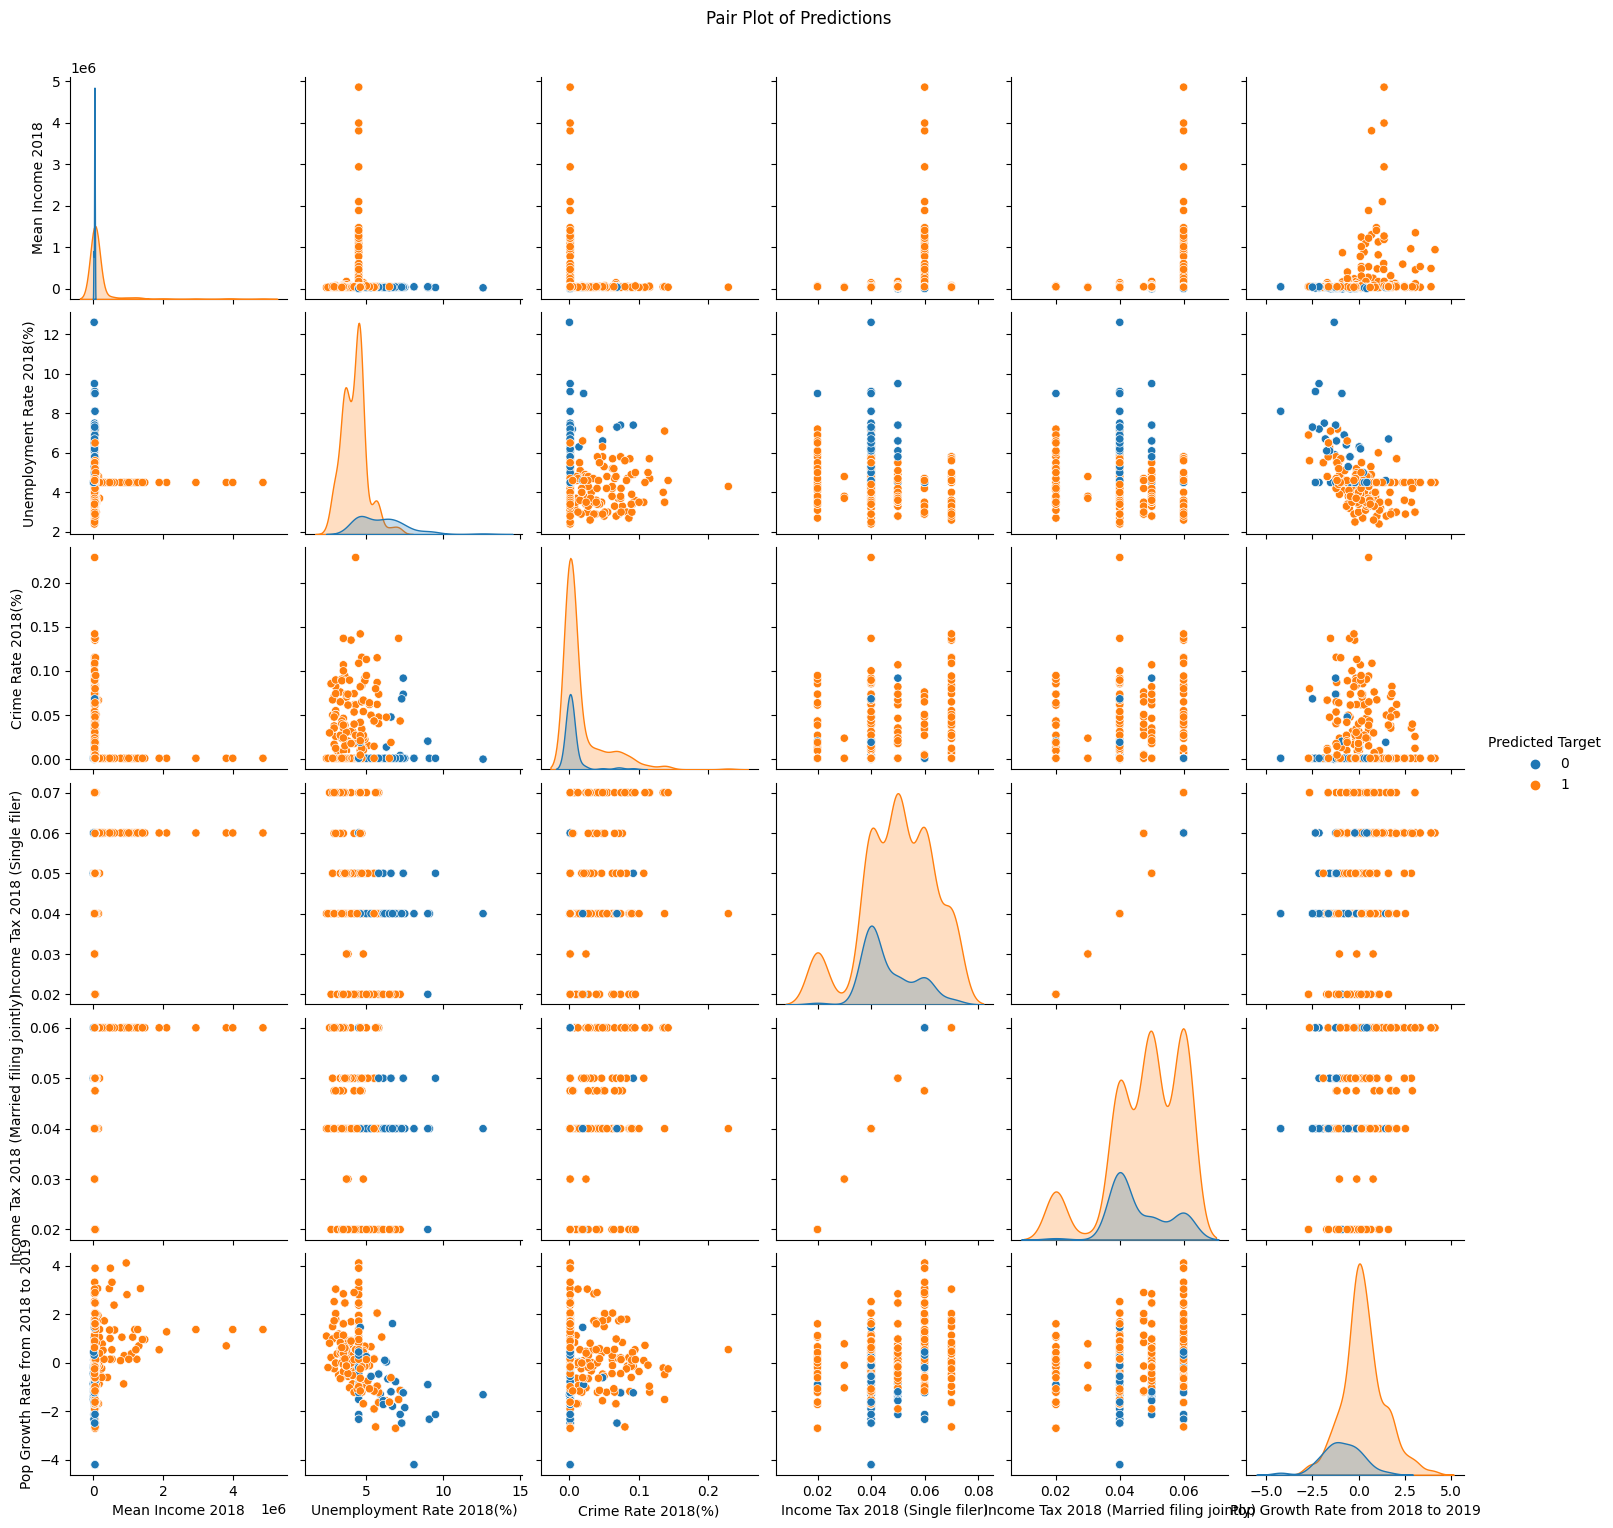

In [63]:
# Creating Pair plot of Predictions made on 500 zipcodes
sns.pairplot(SPDF, hue="Predicted Target")
#Give plot a title
plt.suptitle('Pair Plot of Predictions', y = 1.02)
#Show the plot
plt.show()

In [64]:
# Saving the 500 predictions to csv
SPDF.to_csv('002_500_Predictions_for_7_States.csv')

# Graphing a few of the training data

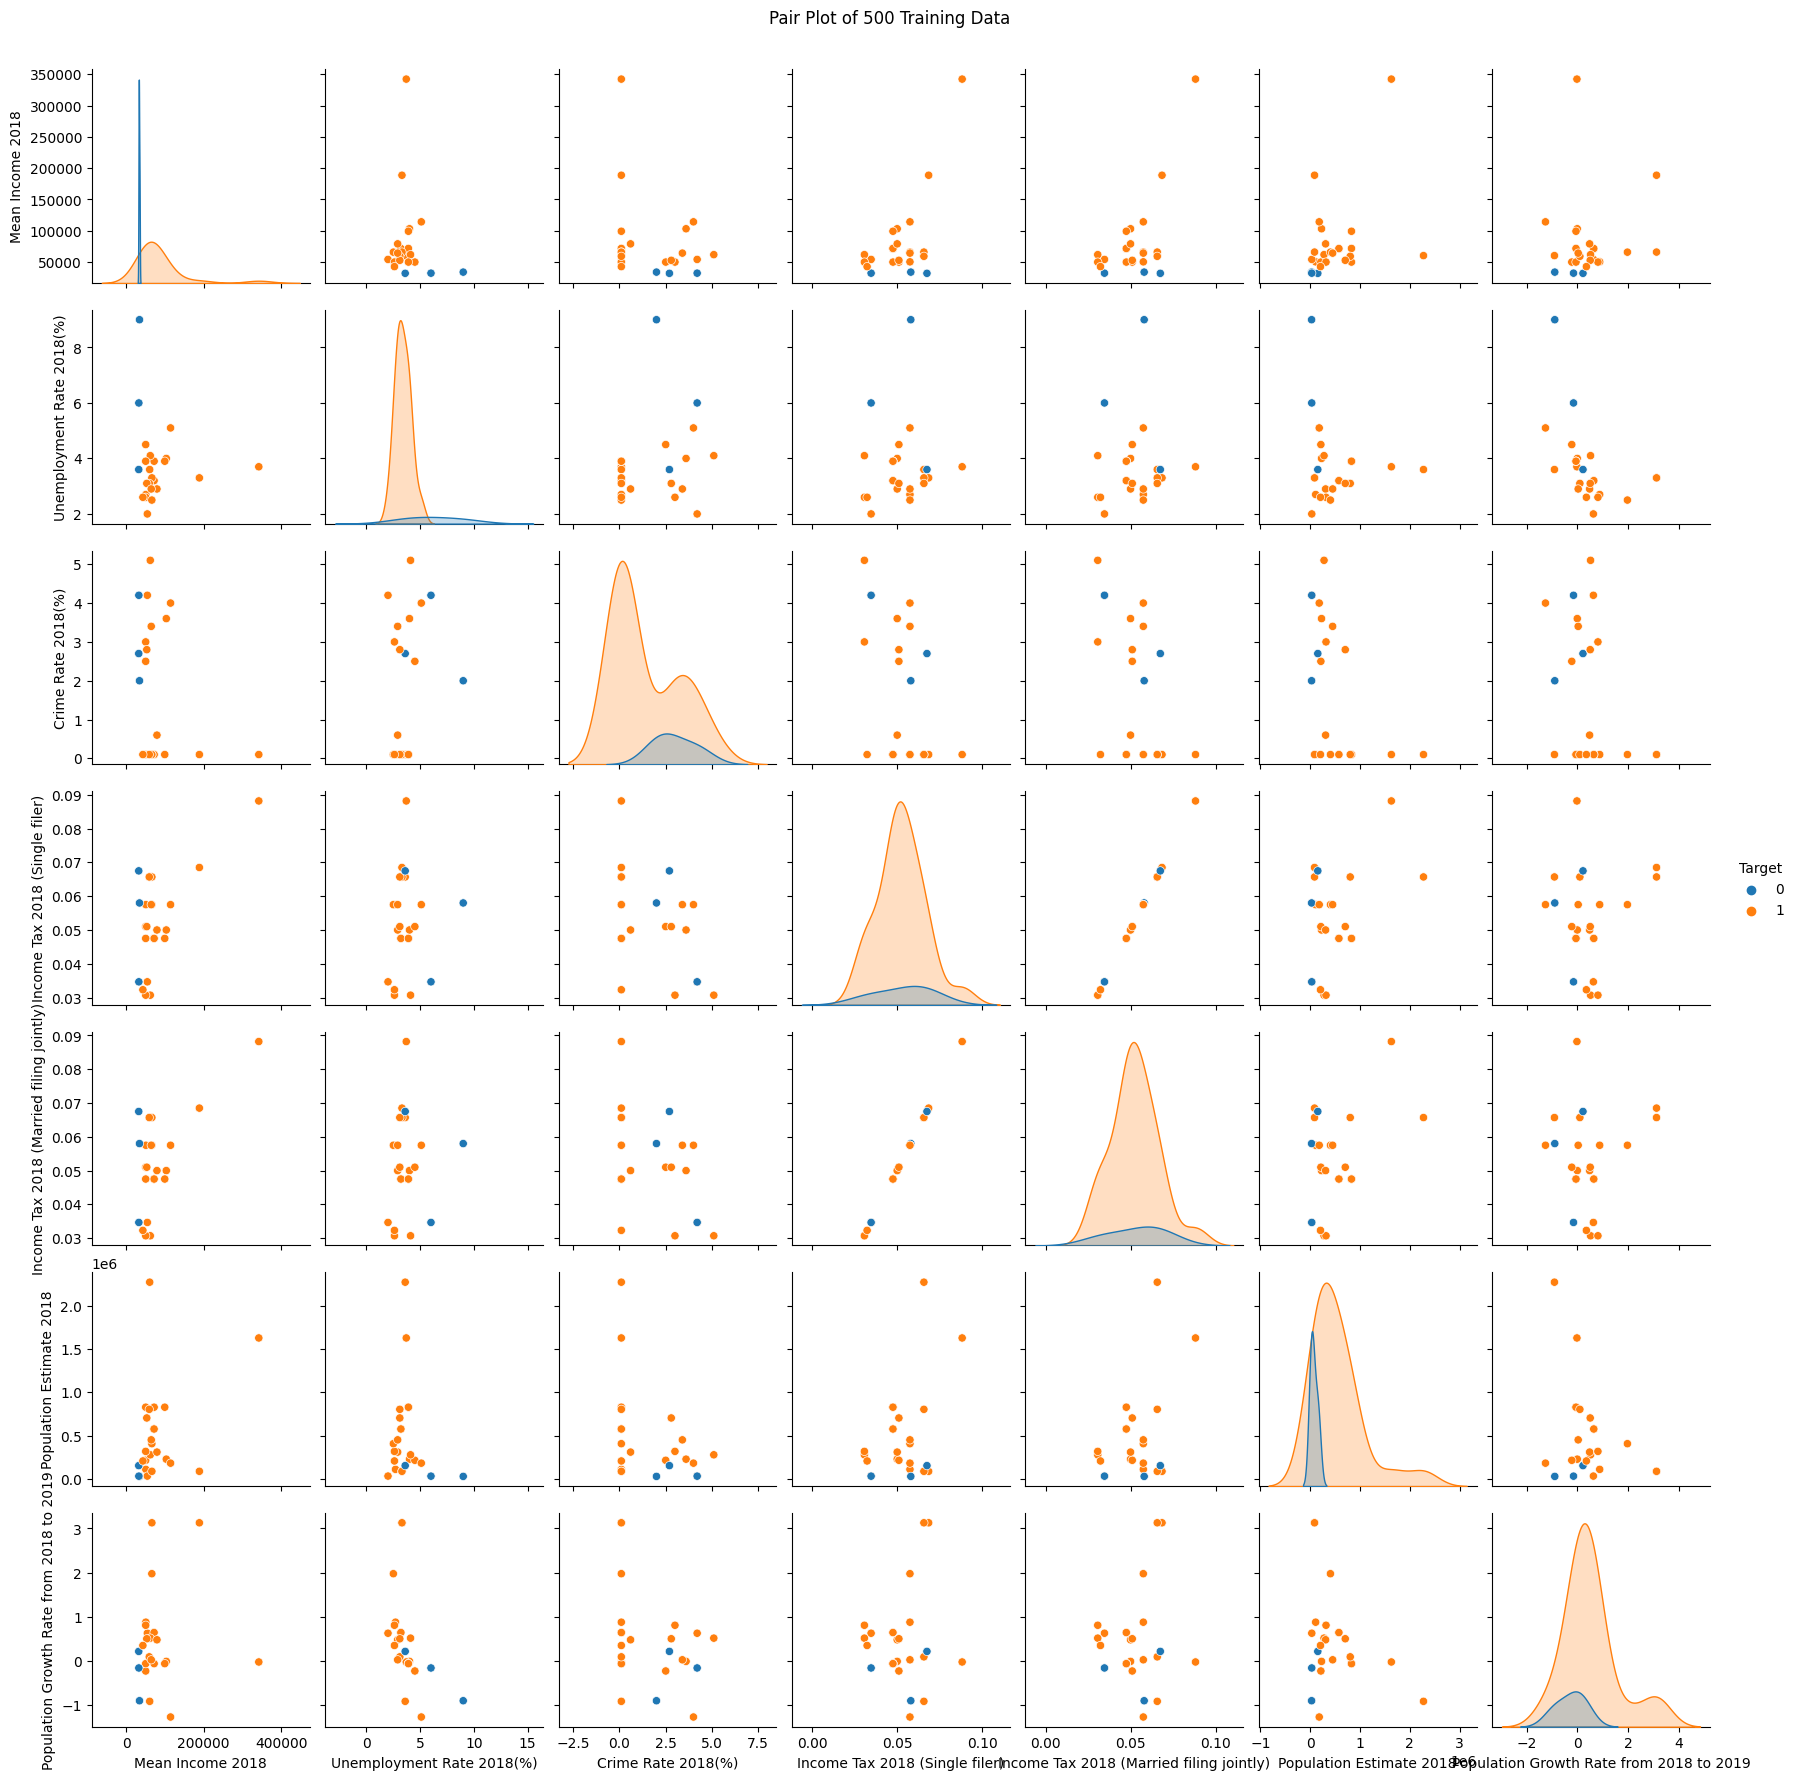

In [67]:
#Sample_Dataset_for_Prediction
GraphTrainData = ds.sample(25)
# Creating Pair plot of Predictions made on 500 zipcodes
sns.pairplot(GraphTrainData, hue="Target")
#Give plot a title
plt.suptitle('Pair Plot of 500 Training Data', y = 1.02)
#Show the plot
plt.show()